# Exploratory Data Analysis (EDA)

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import spacy

nlp = spacy.load('en_core_web_md')

## Load Datasets

In [6]:
scripts_df = pd.read_csv('Data/Processed/scripts.csv')
episods_df = pd.read_csv('Data/Processed/episodes.csv')

scripts_df.head(3)

,episode_id,character,location,raw_text,word_count,normalized_text
0,32,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",31,actually little disease magazine news show nat...
1,32,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,3,mr bergstrom
2,32,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,22,know sure like talk touch lesson plan teach


## Ten Most Active Characters

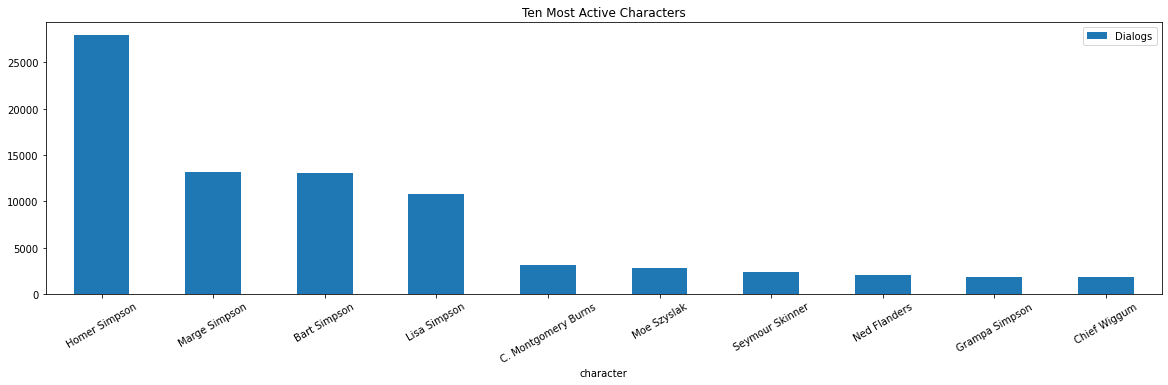

In [7]:
top_ten_active_characters = scripts_df.groupby(
    by = 'character',
    as_index = False
).count().sort_values(
    by = 'raw_text',
    ascending = False
).iloc[:10]

plot = top_ten_active_characters[['character', 'raw_text']].plot.bar(x = 'character', y = 'raw_text', label = 'Dialogs', rot = 30)
fig = plot.get_figure()
plt.title("Ten Most Active Characters")
fig.set_size_inches(20, 5)
fig.savefig("Plots/top_ten_active_characters.png")
plt.show()

## Twenty Top Common Words

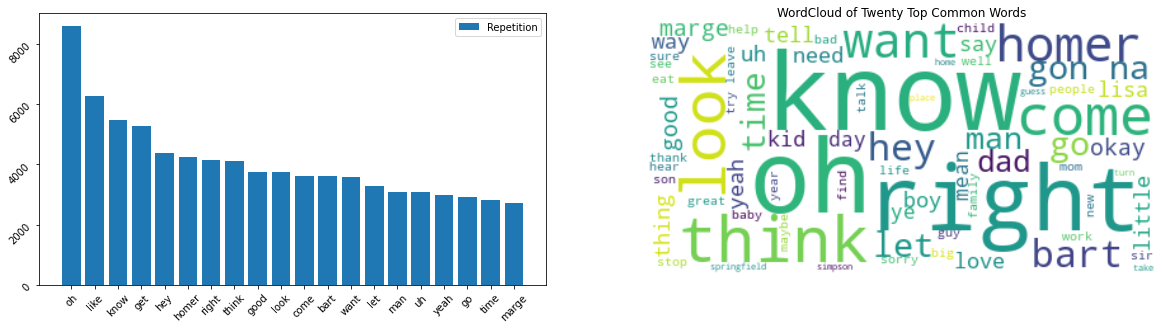

In [8]:
normalized_text_values = scripts_df.loc[scripts_df['normalized_text'].notnull(), 'normalized_text'].values
all_normalized_text = ' '.join(normalized_text_values)
twenty_top_common_words = pd.Index(all_normalized_text.split(' ')).value_counts()[:20]

fig, axs = plt.subplots(1, 2, figsize = (20, 5))

# Bar Plot
axs[0].bar(x = twenty_top_common_words.index, height = twenty_top_common_words.values, label = 'Repetition')
axs[0].legend()
axs[0].tick_params(labelrotation = 45)

# Word Cloud
wordcloud = WordCloud(
    background_color = 'white',
    max_words = 70,
).generate(all_normalized_text)

axs[1].set_title("WordCloud of Twenty Top Common Words")
axs[1].imshow(wordcloud, interpolation = 'bilinear')
axs[1].axis("off")

plt.savefig('Plots/twenty_top_common_words.png')
plt.show()

## Sentiment Analysis

In [111]:
def calc_sentiments(text):
    
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    return pd.Series([polarity, subjectivity])

sentiments = scripts_df.loc[scripts_df['normalized_text'].notnull(), 'normalized_text'].apply(calc_sentiments)
sentiments_df = scripts_df[['character', 'polarity', 'subjectivity']].groupby(by = 'character', as_index = False).sum()

scripts_df['polarity'] = sentiments[0]
scripts_df['subjectivity'] = sentiments[1]

scripts_df.head(3)

,episode_id,character,location,raw_text,word_count,normalized_text,polarity,subjectivity
0,32,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",31,actually little disease magazine news show nat...,-0.04375,0.450000
1,32,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,3,mr bergstrom,0.00000,0.000000
2,32,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,22,know sure like talk touch lesson plan teach,0.50000,0.888889


## Twenty Top Positive Characters

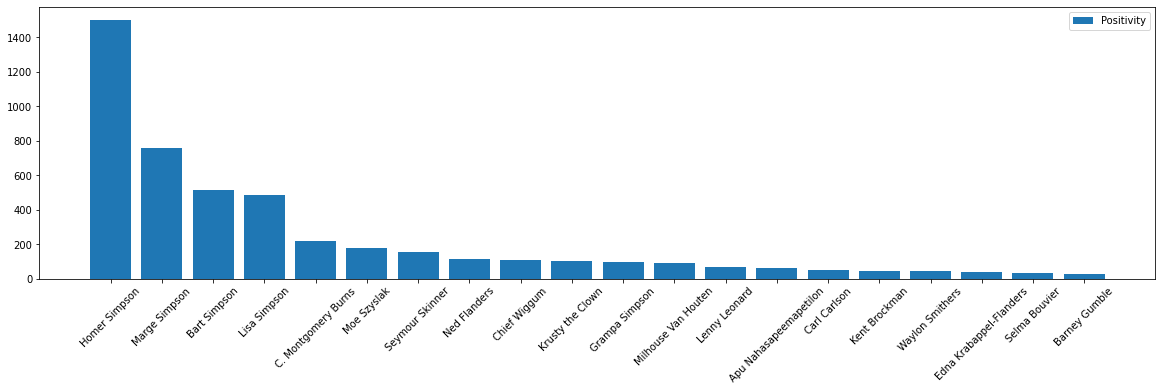

In [112]:
top_twenty_polarity = sentiments_df[['character', 'polarity']].sort_values(by = 'polarity', ascending = False).iloc[:20]

fig = plt.figure(figsize = (20, 5))
plt.bar(x = top_twenty_polarity['character'], height = top_twenty_polarity['polarity'], label = 'Positivity')
plt.legend()
plt.xticks(rotation = 45)
plt.savefig('Plots/top_twenty_polarity.png')
plt.show()

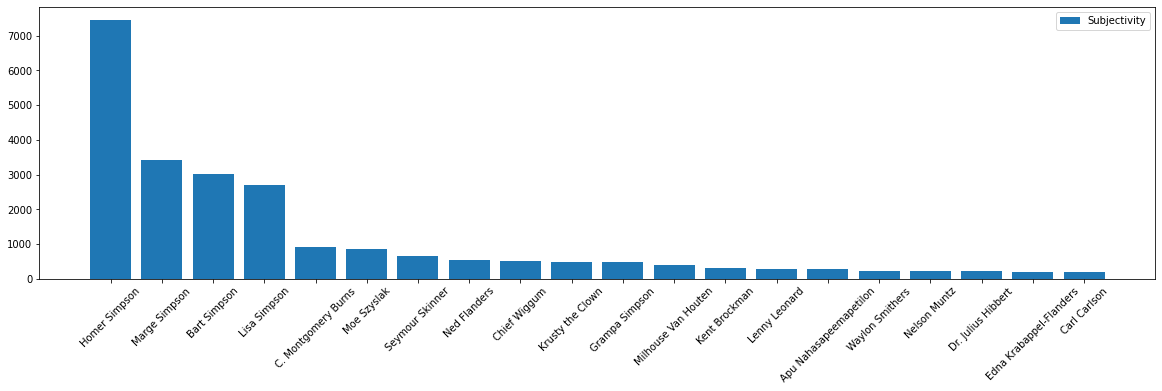

In [113]:
top_twenty_subjectivity = sentiments_df[['character', 'subjectivity']].sort_values(by = 'subjectivity', ascending = False).iloc[:20]

fig = plt.figure(figsize = (20, 5))
plt.bar(x = top_twenty_subjectivity['character'], height = top_twenty_subjectivity['subjectivity'], label = 'Subjectivity')
plt.legend()
plt.xticks(rotation = 45)
plt.savefig('Plots/top_twenty_subjectivity.png')
plt.show()

## Top Twenty Positive & Negative Words

In [155]:
normalized_words = pd.Series(' '.join(scripts_df.loc[scripts_df['normalized_text'].notnull(), 'normalized_text']).split(' '))

word_freq = normalized_words.value_counts()

words_df = pd.DataFrame(data = {'word': word_freq.keys(), 'repetition': word_freq.values})
sentiments_df = words_df['word'].apply(calc_sentiments)

words_df['polarity'] = sentiments_df[0]
words_df['subjectivity'] = sentiments_df[1]

words_df['popularity'] = words_df['polarity'] * words_df['repetition']

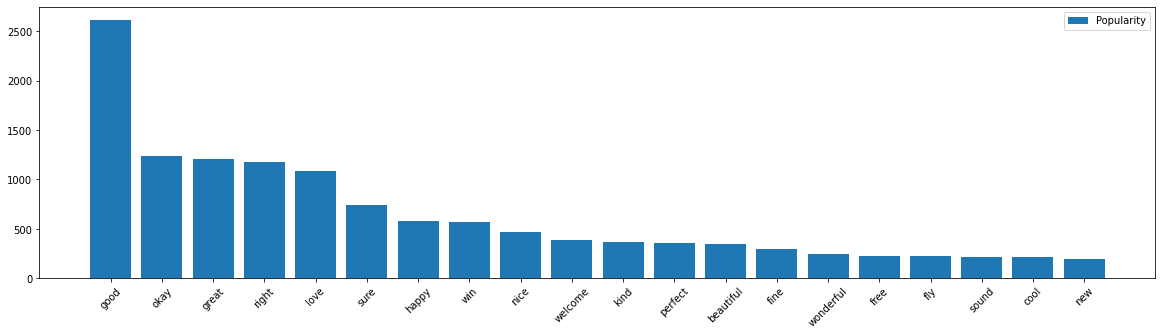

In [171]:
top_twenty_popular_words = words_df.sort_values(by = 'popularity', ascending = False).iloc[:20]

fig = plt.figure(figsize = (20, 5))
plt.bar(x = top_twenty_popular_words['word'], height = top_twenty_popular_words['popularity'], label = 'Popularity')
plt.xticks(rotation = 45)
plt.savefig('Plots/top_twenty_popular_words.png')
plt.legend()
plt.show()